In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
haz_data = pd.read_excel('../inputdata/impacts/emdat_EU_1950_2022_all_haz.xlsx',header=6)

/home/lseverino/.conda/envs/climada_env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [94]:
haz_data['Disaster Subsubtype'].unique()

array([nan, 'Severe storm', 'Tornado', 'Winter storm/Blizzard', 'Hail',
       'Lightning/Thunderstorms', 'Snow/Ice', 'Derecho'], dtype=object)

In [103]:
haz_sub = haz_data.where(haz_data['Disaster Subgroup'].isin(['Hydrological','Climatological', 'Meteorological'])).dropna(how='all')

In [104]:
#only sel data from the last 40 years
haz_sub = haz_sub.where(haz_sub['Year']>=1980)

In [105]:
#only keep certain disaster type

In [106]:
keep = ['Total Deaths','No Injured','No Affected','Total Affected', "Total Damages, Adjusted ('000 US$)"]

In [110]:
grouped_df = haz_sub.groupby('Disaster Subtype',axis=0)[keep].aggregate(np.sum)
grouped_df2 = grouped_df.groupby(grouped_df["Total Damages, Adjusted ('000 US$)"]<10000).aggregate(np.sum)

In [121]:
grouped_df_norm = grouped_df/grouped_df.sum()
grouped_df_norm = grouped_df_norm["Total Damages, Adjusted ('000 US$)"]

In [136]:
grouped_df_big = grouped_df_norm.where(grouped_df_norm>=0.02).dropna()
grouped_df_rest = grouped_df_norm.where(grouped_df_norm<0.02).dropna()
rest = grouped_df_rest.sum()

In [137]:
grouped_df_big.loc['Other']=rest

In [138]:
grouped_df_norm

Disaster Subtype
Avalanche                           0.003302
Coastal flood                       0.000171
Cold wave                           0.025406
Convective storm                    0.085229
Drought                             0.134578
Extra-tropical storm                0.197378
Flash flood                         0.074187
Forest fire                         0.047789
Heat wave                           0.050122
Land fire (Brush, Bush, Pasture)    0.009406
Landslide                           0.000364
Mudslide                            0.000818
Riverine flood                      0.356795
Severe winter conditions            0.003713
Tropical cyclone                    0.010742
Name: Total Damages, Adjusted ('000 US$), dtype: float64

In [139]:
grouped_df["Total Damages, Adjusted ('000 US$)"].astype('str').tolist()

['1233884.0',
 '64068.0',
 '9494854.0',
 '31852627.0',
 '50295588.0',
 '73765980.0',
 '27725858.0',
 '17860149.0',
 '18732225.0',
 '3515270.0',
 '136107.0',
 '305709.0',
 '133344601.0',
 '1387513.0',
 '4014432.0']

Text(0.5, 1.0, 'Total recorded damages (1980-2022)\nEM-DAT')

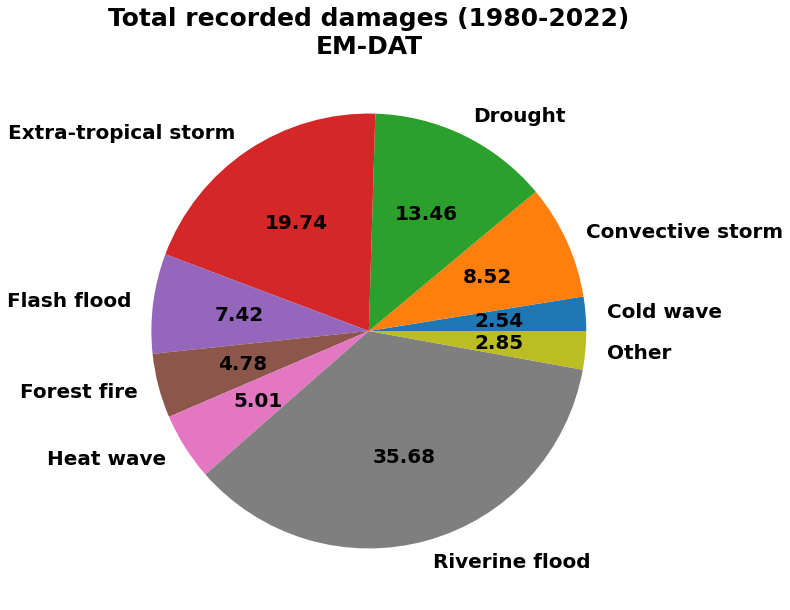

In [149]:
textprops={'fontsize':20,'fontweight':'bold'}
ax = grouped_df_big.plot.pie(figsize=(10,10),autopct='%.2f',textprops=textprops)
ax.set_ylabel("", fontsize=20,fontweight='bold')
ax.set_title("Total recorded damages (1980-2022)\nEM-DAT", fontsize=25,fontweight='bold')

array([[<AxesSubplot:ylabel='Total Deaths'>],
       [<AxesSubplot:ylabel='No Injured'>],
       [<AxesSubplot:ylabel='No Affected'>],
       [<AxesSubplot:ylabel='Total Affected'>],
       [<AxesSubplot:ylabel="Total Damages, Adjusted ('000 US$)">]],
      dtype=object)

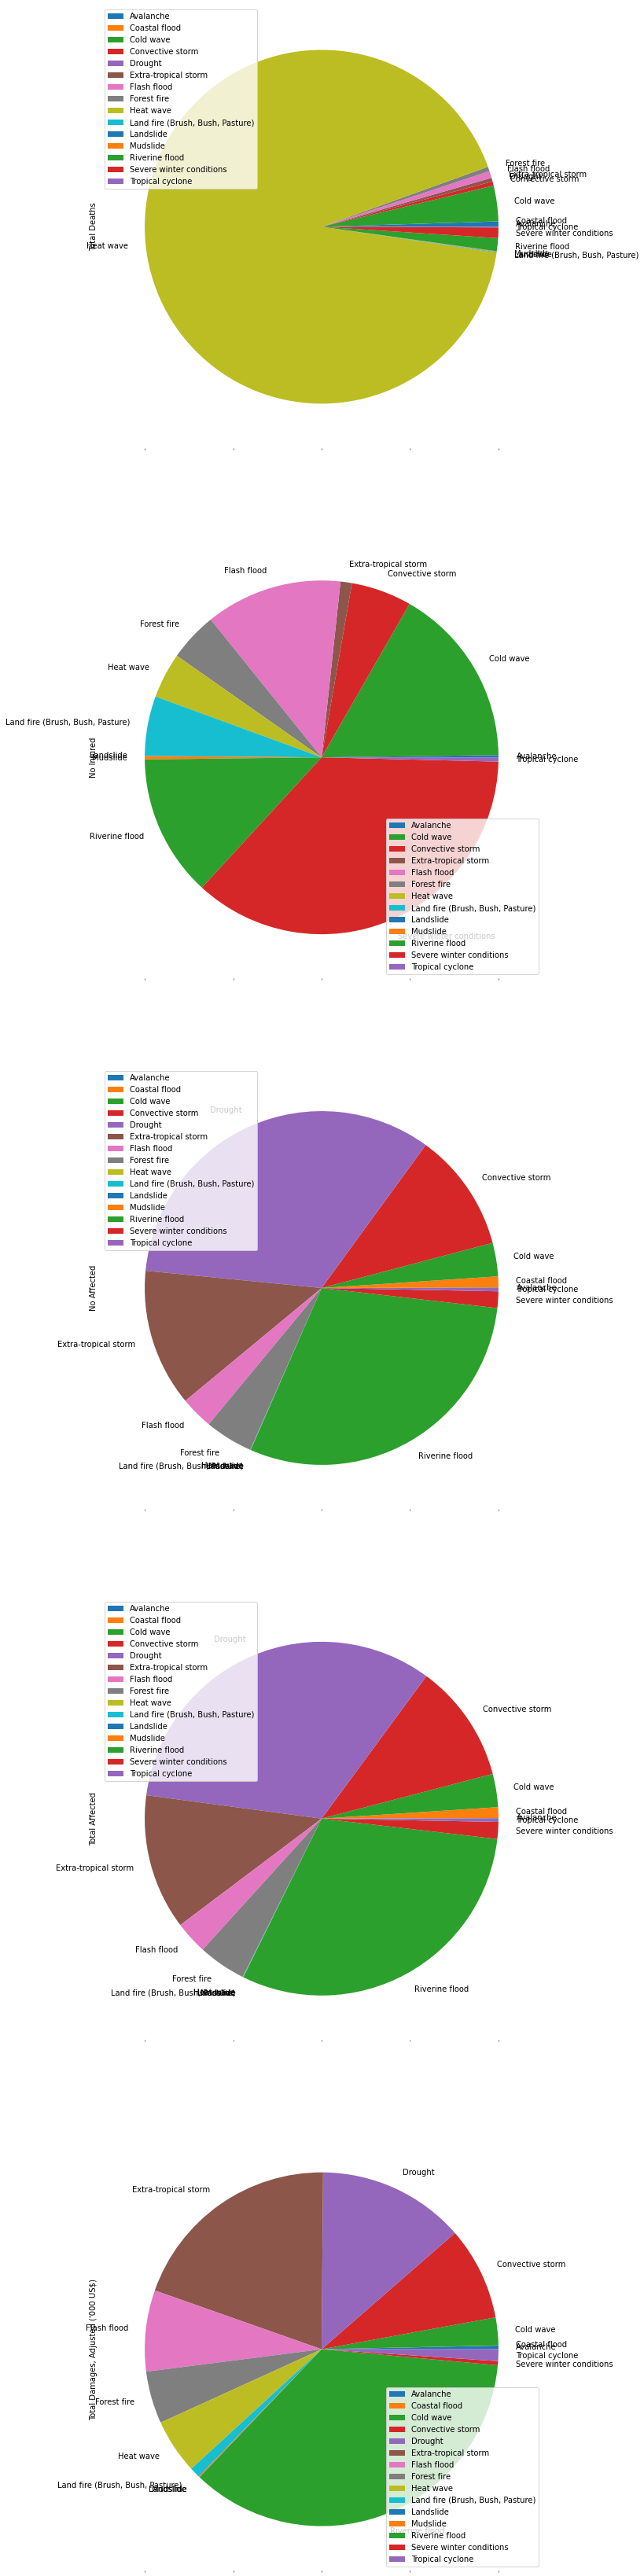

In [60]:
grouped_df.plot.pie(subplots=True,layout=(5,1),figsize=(100,60))

In [ ]:
# keep only useful data
keep = ['Dis No','Seq', 'Year','Country','Region','Dis Mag Value','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs (\'000 US$)',
       'Insured Damages (\'000 US$)', 'Total Damages (\'000 US$)']
ETC_small = ETC_data[keep]

In [53]:
#remove 2022
ETC_small = ETC_small.where(ETC_small['Start Year']!=2022).dropna(how='all',axis=0)

In [54]:
ETC_small

,Dis No,Seq,Year,Country,Region,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1998-0007-GBR,7.0,1998.0,United Kingdom of Great Britain and Northern I...,Northern Europe,185.0,1998.0,1.0,1.0,1998.0,1.0,6.0,15.0,NaN,3000.0,3000.0,NaN,320000.0,500000.0
1,1998-0436-BEL,436.0,1998.0,Belgium,Western Europe,NaN,1998.0,1.0,1.0,1998.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,1998-0436-CHE,436.0,1998.0,Switzerland,Western Europe,NaN,1998.0,1.0,1.0,1998.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
3,1999-0571-BEL,571.0,1999.0,Belgium,Western Europe,NaN,1999.0,12.0,25.0,1999.0,12.0,27.0,2.0,NaN,NaN,NaN,NaN,10000.0,50000.0
4,1999-0571-CHE,571.0,1999.0,Switzerland,Western Europe,210.0,1999.0,12.0,25.0,1999.0,12.0,27.0,12.0,NaN,NaN,NaN,NaN,800000.0,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2019-0626-PRT,626.0,2019.0,Portugal,Southern Europe,NaN,2019.0,12.0,19.0,2019.0,12.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
124,2020-0051-POL,51.0,2020.0,Poland,Eastern Europe,NaN,2020.0,2.0,8.0,2020.0,2.0,9.0,3.0,6.0,NaN,6.0,NaN,NaN,NaN
125,2020-0051-SVN,51.0,2020.0,Slovenia,Southern Europe,NaN,2020.0,2.0,7.0,2020.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
126,2020-0051-SWE,51.0,2020.0,Sweden,Northern Europe,NaN,2020.0,2.0,7.0,2020.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#build time index
dft_start = pd.DataFrame(

    {"year": ETC_small['Start Year'], "month": ETC_small['Start Month'], "day": ETC_small['Start Day']}

)
dft_end = pd.DataFrame(

    {"year": ETC_small['End Year'], "month": ETC_small['End Month'], "day": ETC_small['End Day']}

)
dti_start = pd.to_datetime(dft_start)
dti_end= pd.to_datetime(dft_end)


In [56]:
# resample to daily
ETC_dmg = ETC_small['Total Damages (\'000 US$)']
ETC_dmg.index = dti_start

In [57]:
#count events with damages
ETC_dmg_nona = ETC_dmg.dropna()
nev_nona = len(ETC_dmg_nona)
print("Events with total damages estimation: "+str(nev_nona))

Events with total damages estimation: 76


In [78]:
ETC_dmg_daily

1998-01-01    652600.0
1998-01-02         0.0
1998-01-03         0.0
1998-01-04         0.0
1998-01-05         0.0
                ...   
2021-06-13         0.0
2021-06-14         0.0
2021-06-15         0.0
2021-06-16         0.0
2021-06-17    170000.0
Freq: D, Name: Total Damages ('000 US$), Length: 8569, dtype: float64

In [58]:
#daily resample
ETC_dmg_daily = ETC_dmg.resample("1D").sum()
ETC_dmg_yearly = ETC_dmg.resample("1Y").sum()

In [84]:
ETC_dmg_yearly

1998-12-31      652600.0
1999-12-31    18376939.0
2000-12-31           0.0
2001-12-31           0.0
2002-12-31     2531050.0
2003-12-31      305050.0
2004-12-31           0.0
2005-12-31     5635000.0
2006-12-31           0.0
2007-12-31     9010000.0
2008-12-31     1800000.0
2009-12-31     5100000.0
2010-12-31     6073500.0
2011-12-31           0.0
2012-12-31           0.0
2013-12-31       10000.0
2014-12-31      100000.0
2015-12-31           0.0
2016-12-31           0.0
2017-12-31      100000.0
2018-12-31     1798486.0
2019-12-31           0.0
2020-12-31      315000.0
2021-12-31      170000.0
Freq: A-DEC, Name: Total Damages ('000 US$), dtype: float64

In [83]:
print(len(ETC_dmg_yearly))
len(ETC_dmg_yearly[ETC_dmg_yearly>0])

24


15

In [63]:
aai_agg = ETC_dmg_yearly.mean()
print('AAI aggregated: '+format(aai_agg,'.3E')+' USD')

AAI aggregated: 2.166E+06 USD


<AxesSubplot:>

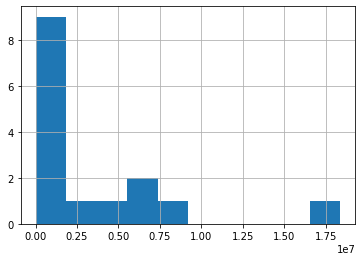

In [76]:
ETC_dmg_yearly[ETC_dmg_yearly>0].hist()

Text(0.5, 0, "log of yearly damages ('000 USD)")

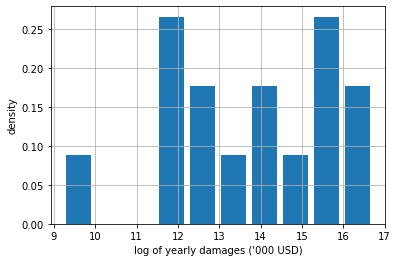

In [97]:
ETC_dmg_yearly_nozero = ETC_dmg_yearly[ETC_dmg_yearly>0] #take only values above 0
ETC_dmg_yearly_log = ETC_dmg_yearly_nozero.apply(np.log)
ETC_dmg_yearly_log.hist(rwidth=0.8,density=True)
plt.ylabel('density')
plt.xlabel('log of yearly damages (\'000 USD)')

In [135]:
len(bins)

11

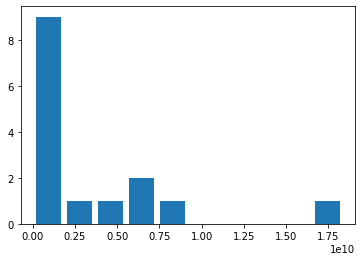

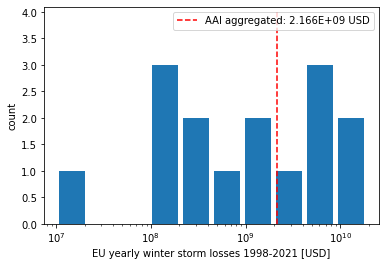

In [150]:
ETC_dmg_yearly_nozero = ETC_dmg_yearly[ETC_dmg_yearly>0] 
ETC_dmg_yearly_nozero = 1000*ETC_dmg_yearly_nozero
plt.figure()
hist, bins, _ = plt.hist(ETC_dmg_yearly_nozero.values,rwidth=0.8)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
logbins[-1] = logbins[-1]+10 #otherwise lastdatapoint is missing
fig = plt.figure()
plt.hist(ETC_dmg_yearly_nozero.values, bins=logbins,rwidth=0.85)
aai_agg_str = 'AAI aggregated: '+format(1000*aai_agg,'.3E')+' USD'
plt.vlines(1000*aai_agg,0,4,color='red',linestyles='dashed',label=aai_agg_str)
plt.xscale('log')
plt.ylim([0,4.1])
plt.ylabel("count")
plt.xlabel("EU yearly winter storm losses 1998-2021 [USD]")
plt.legend()
fig.savefig("./results/figures/EMDAT/hist_yearly_losses_EMDAT.png",transparent=False)


In [148]:
plt.hist??

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

P

In [147]:
logbins

array([1.00000000e+07, 2.12044649e+07, 4.49629332e+07, 9.53414938e+07,
       2.02166536e+08, 4.28683321e+08, 9.09000044e+08, 1.92748595e+09,
       4.08713082e+09, 8.66654221e+09, 1.83769390e+10])

In [143]:
ETC_dmg_yearly_nozero

1998-12-31    6.526000e+08
1999-12-31    1.837694e+10
2002-12-31    2.531050e+09
2003-12-31    3.050500e+08
2005-12-31    5.635000e+09
2007-12-31    9.010000e+09
2008-12-31    1.800000e+09
2009-12-31    5.100000e+09
2010-12-31    6.073500e+09
2013-12-31    1.000000e+07
2014-12-31    1.000000e+08
2017-12-31    1.000000e+08
2018-12-31    1.798486e+09
2020-12-31    3.150000e+08
2021-12-31    1.700000e+08
Name: Total Damages ('000 US$), dtype: float64

In [80]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

(array([1., 0., 0., 3., 2., 1., 2., 1., 3., 2.]),
 array([ 9.21034037,  9.96196705, 10.71359372, 11.4652204 , 12.21684707,
        12.96847375, 13.72010042, 14.4717271 , 15.22335377, 15.97498045,
        16.72660712]),
 <BarContainer object of 10 artists>)

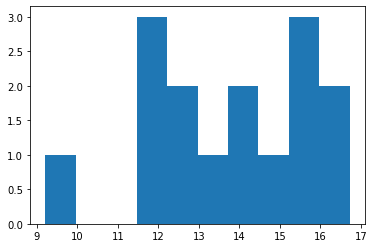

In [79]:
plt.hist(ETC_dmg_yearly_log)

<AxesSubplot:>

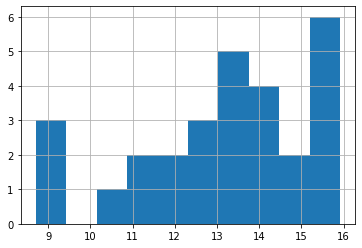

In [77]:
ETC_dmg_daily_log = ETC_dmg_daily[ETC_dmg_daily>0] #take only values above 0
ETC_dmg_daily_log = ETC_dmg_daily_log.apply(np.log)
ETC_dmg_daily_log.hist()

In [20]:
#days with non 0 damages
ndays_nona = len(ETC_dmg_daily.where(ETC_dmg_daily>0).dropna())
print("Nb of days with total damages estimation: "+str(ndays_nona))

Nb of days with total damages estimation: 28


<AxesSubplot:>

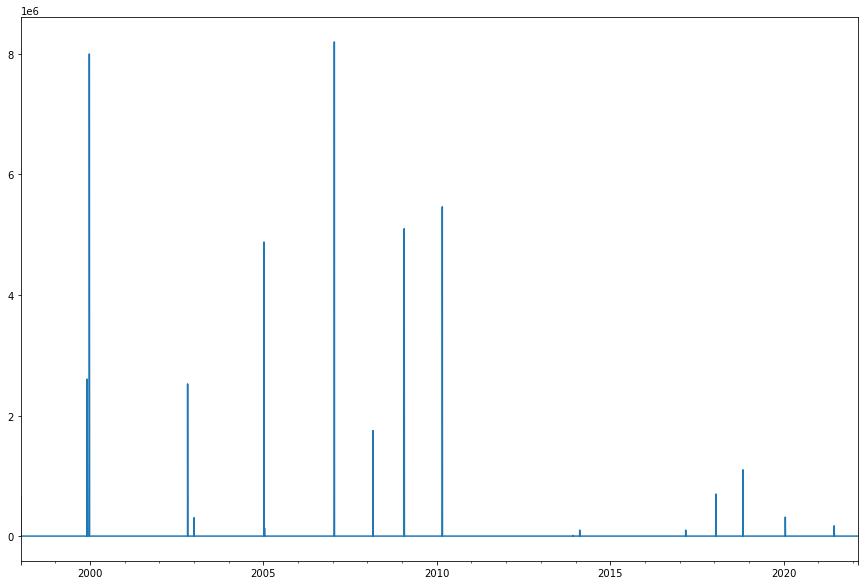

In [21]:
ETC_dmg_daily.plot(figsize=(15,10))

In [22]:
tot_dam_raw = ETC_data.loc[:,'Total Damages (\'000 US$)']
ndata_raw = len(tot_dam_raw)
tot_dam = tot_dam_raw.dropna()
ndata = len(tot_dam)
print('Proportion non-missing data: {:.2f}'.format(ndata/ndata_raw))


Proportion non-missing data: 0.55


In [23]:
print('Total damages in bilion USD: {:.4f}'.format(tot_dam.sum()/10**6))


Total damages in bilion USD: 51.9776


In [24]:
yearly_damage = ETC_data.pivot(index="Year", columns="Dis No", values="Total Damages ('000 US$)")


In [25]:
yearly_damage

Dis No,1998-0007-GBR,1998-0436-BEL,1998-0436-CHE,1998-0436-ESP,1998-0436-FRA,1998-0436-NLD,1999-0571-BEL,1999-0571-CHE,1999-0571-DEU,1999-0571-FRA,...,2022-0097-DEU,2022-0097-GBR,2022-0097-POL,2022-0112-BEL,2022-0112-DEU,2022-0112-FRA,2022-0112-GBR,2022-0112-IRL,2022-0112-NLD,2022-0112-POL
Year,,,,,,,,,,,,,,,,,,,,,
1998,500000.0,500.0,1000.0,1000.0,150000.0,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,1500000.0,1600000.0,8000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
newid = pd.MultiIndex.from_frame(ETC_data.loc[:,("Year","Dis No")])


In [27]:
yrly_dam = ETC_data.loc[:,"Total Damages ('000 US$)"].copy()
yrly_dam.index = newid